## 1. Basic Plots

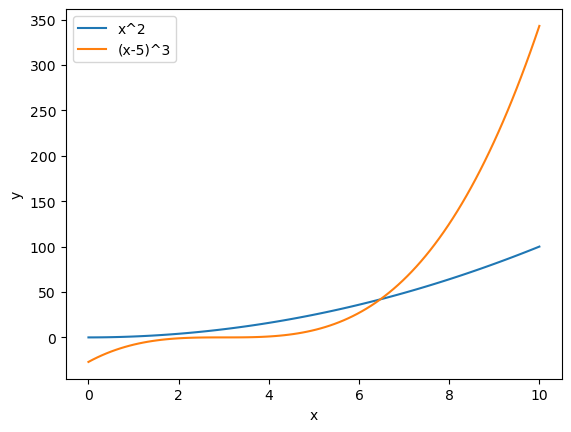

In [3]:
################# basic plots ###############

import matplotlib.pyplot as plt
import numpy as np
# %%
x = np.linspace(0, 10, 100)

# %%
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, x**2, label='x^2')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x, (x-3)**3, label='(x-5)^3')
ax.legend()

## LegendBox and Ticks

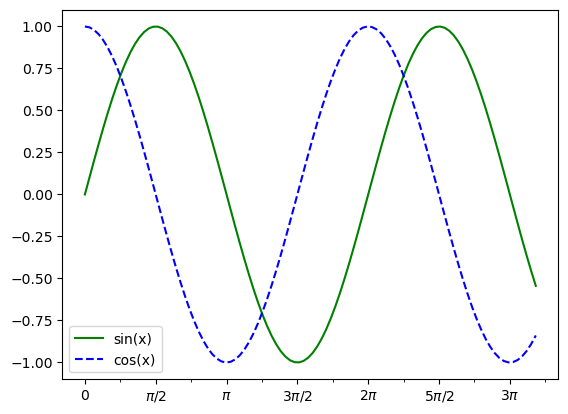

In [5]:
################# legend and ticks ###############
# ref Python Data Science Handbook
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, np.sin(x), '-g', label='sin(x)')
ax.plot(x, np.cos(x), '--b', label='cos(x)')
ax.legend()
# %%
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4))
fig
# %%
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value /np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N %2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)
# %%
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

## Multiple Subplots

### plt.subplots

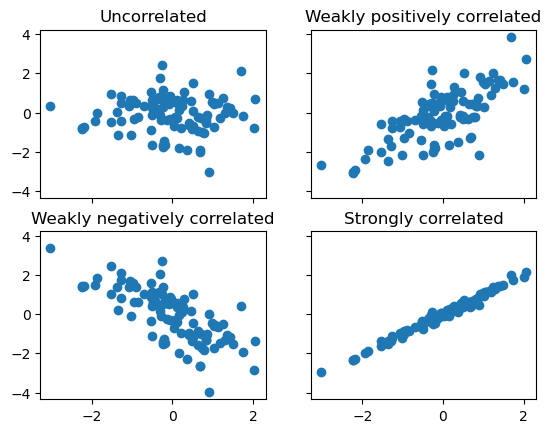

In [7]:
################# plt.subplots ###############
x1 = np.random.randn(100)
x2 = np.random.randn(100)

fig, axes = plt.subplots(2,2, sharex=True, sharey=True, squeeze=False)
axes[0,0].set_title('Uncorrelated')
axes[0,0].scatter(x1, x2)
axes[0,1].set_title('Weakly positively correlated')
axes[0,1].scatter(x1, x1+x2)
axes[1,0].set_title('Weakly negatively correlated')
axes[1,0].scatter(x1, -x1+x2)
axes[1,1].set_title('Strongly correlated')
axes[1,1].scatter(x1, x1 + 0.15*x2)

### fig.add_axes

Text(0, 0.5, '$f(x)$')

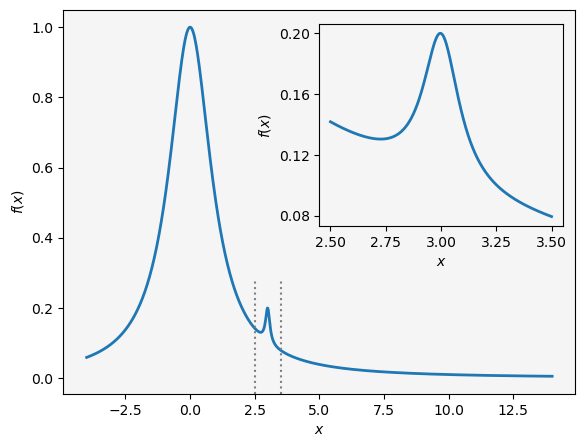

In [9]:
################# fig.add_axes ###############

import matplotlib as mpl


def f(x):
    return 1/(1+x**2) + 0.1/(1+((3-x)/0.1)**2)

fig = plt.figure()

# main graph
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor='#f5f5f5')
x = np.linspace(-4, 14, 1000)
ax.plot(x, f(x), linewidth=2)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')

# inset
x0, x1 = 2.5, 3.5
ax.axvline(x0, ymax=0.3, color='grey', linestyle=':')
ax.axvline(x1, ymax=0.3, color='grey', linestyle=':')

ax_insert = fig.add_axes([0.5, 0.5, 0.38, 0.42], facecolor='none')
x = np.linspace(x0, x1, 1000)
ax_insert.plot(x, f(x), linewidth=2)
ax_insert.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
ax_insert.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax_insert.set_xlabel(r'$x$')
ax_insert.set_ylabel(r'$f(x)$')

## Histogram and Normal plots

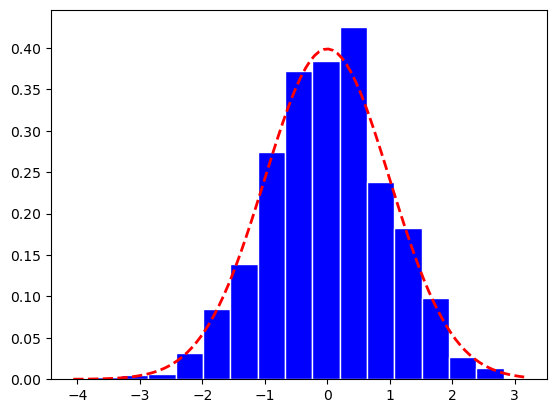

In [10]:
################# histogram and normal plots ###############
from scipy.stats import norm

data = np.random.normal(size=1000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data, edgecolor='w', color='b', density=True, bins=15)

xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
ax.plot(x, p, '--r', linewidth=2)

## Colorbar

#### included in ax

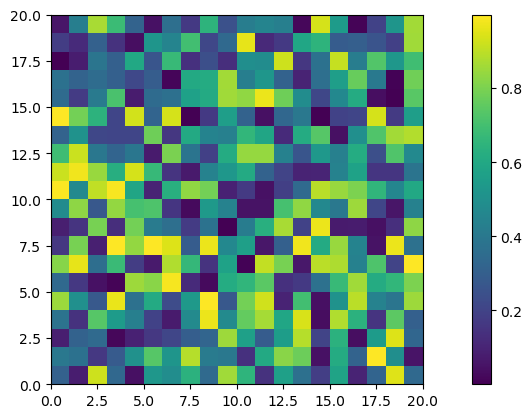

In [11]:
################# colorbar ###############
# ref https://stackoverflow.com/questions/13310594/positioning-the-colorbar
x = np.random.random((20, 20))

# 1. using pad
fig = plt.figure()
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(x, cmap='viridis')
fig.colorbar(pcm, orientation='vertical', pad=0.1)

#### using subplots

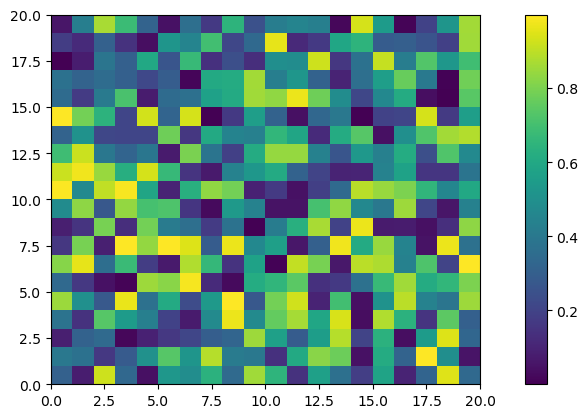

In [12]:
# 2. using subplots
fig, (ax, cax) = plt.subplots(ncols=2,
    gridspec_kw={"width_ratios":[1, 0.05]})
pcm = ax.pcolormesh(x, cmap='viridis')
fig.colorbar(pcm, cax=cax, orientation='vertical')

#### using an axes divider

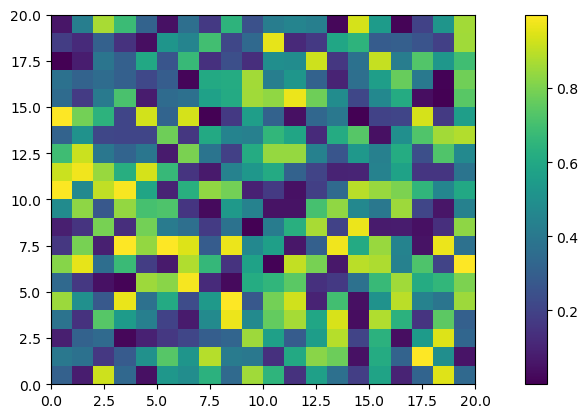

In [15]:
# 3. using an axes divider
fig, ax = plt.subplots()
pcm = ax.pcolormesh(x, cmap='viridis')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size="5%", pad=0.5, pack_start=False)
fig.add_axes(cax)
fig.colorbar(pcm, cax=cax, orientation='vertical')

#### Creating listed colormaps

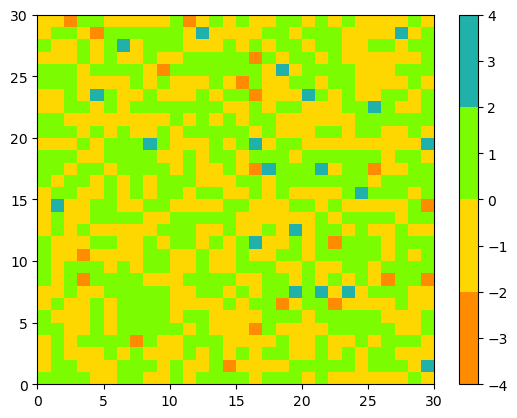

In [16]:
# Creating listed colormaps
# %%
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# %%
cmap = ListedColormap(['darkorange','gold','lawngreen','lightseagreen'])

np.random.seed(19680801)
data = np.random.randn(30, 30)
n = len([cmap])
fig = plt.figure()
ax = fig.add_subplot(111)
psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
fig.colorbar(psm, ax=ax)